The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


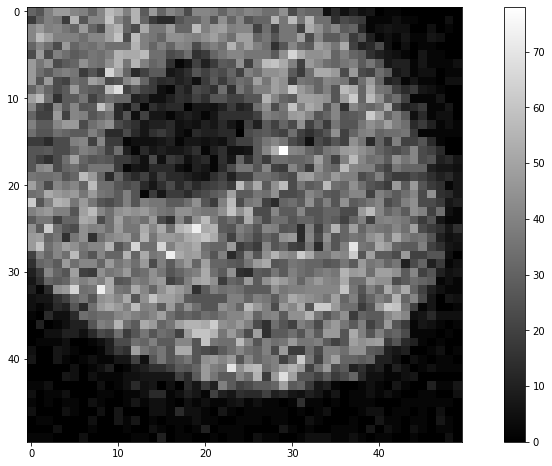

In [18]:
# unseeded region growing
%load_ext autoreload
%autoreload 2
import skimage.io as sk
import numpy as np
from Functions import image_processing as ip
from Functions import old_seeded_region_growing as old_srg
from Functions import old_unseeded_region_growing as old_urg
from Functions import unseeded_region_growing as urg

image = sk.imread("../Data/N2DH-GOWT1/img/t01.tif")
img_r = image[300:350,450:500]
ip.show_image(img_r, 15, 8)


In [15]:
# Region Array

regions = np.zeros(img_r.shape, int) # array with region number
regions[0,0] = 1 # Startpixel is region number 1

In [21]:
%timeit urg.unseeded_region_growing_algorithm(img_r, (0,0), 5)
%timeit old_urg.old_unseeded_region_growing_algorithm(img_r, (0,0), 5)

1000
2000
1000
2000
1000
2000
1000
2000
1000
2000
1000
2000
1000
2000
1000
2000
799 ms ± 28.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1000
2000
1000
2000
1000
2000
1000
2000
1000
2000
1000
2000
1000
2000
1000
2000
1min 16s ± 4.37 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


1000


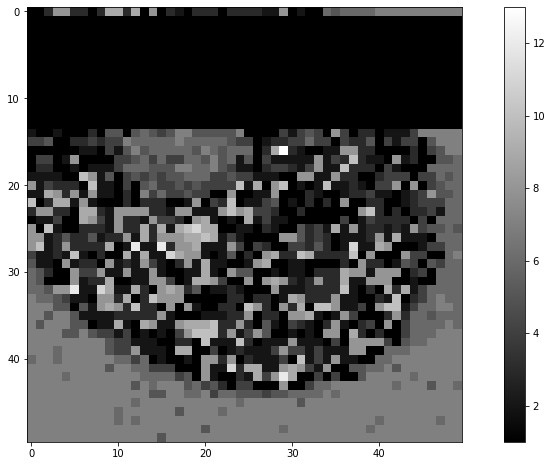

In [20]:
unseeded_test = old_urg.old_unseeded_region_growing_algorithm(img_r, regions, 5)
ip.show_image(unseeded_test, 15,8)

In [3]:
# Unseeded find neighbors

ne = old_srg.find_neighbors(regions)
print(ne)

[(1, 0), (0, 1)]


In [4]:
# Unseeded mean region

print(old_srg.mean_region(img_r, regions))


[0.0]


In [5]:
# Unseeded distance

distance = old_urg.old_unseeded_distance(img_r, ne, regions)
print(distance[0])
print(distance[1])

[[500   0 500 ... 500 500 500]
 [  0 500 500 ... 500 500 500]
 [500 500 500 ... 500 500 500]
 ...
 [500 500 500 ... 500 500 500]
 [500 500 500 ... 500 500 500]
 [500 500 500 ... 500 500 500]]
[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [6]:
# z Aussuchen

picked_pixel = old_urg.old_unseeded_pixel_pick(distance[0])
print(picked_pixel)

(0, 1)


In [7]:
t = 5 # Threshold ist willkürlich festgesetzt
# Regions Zuweisung z
# Distanz nochmal berechnen, zu Nachbarn mit region, und der gleichen Region zuweisen

#test = urg.unseeded_region_direct(regions, picked_pixel, distance[1])

#print(test)

In [8]:
# Zu nächst ähnlicher Region zuweisen
# Distanz zu allen Regionen ausrechnen und zu der mit der kleinsten Distanz zuweisen
# Fehlermeldung hier ist okay, da Pixel wie oben zugeordnet wird

test3 = old_urg.old_unseeded_region_indirect_or_new(img_r, regions, picked_pixel, distance)
print(test3)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Region A1 festlegen, Liste für alle vorhandenen Regionen erstellen (Listen Ai)

Nachbarn bestimmen (Liste Ne)

Liste Ne erstellen, die alle Pixel enthält die an gefundene Regionen grenzen

Pixel x aus Liste Ne_total auswählen

Liste N(x) sind die direkten Nachbarn von Pixel x

Difference measure: Formel 1 Paper, Differenz Intensität Pixel x zu der Durchschnitts-Intensität der Region Ai
Pixel x und Ai müssen aneinander angrenzen

Differenz von allen Pixeln in Liste Ne_total zu allen deren angrenzenden Regionen berechnen
Pixel mit kleinstem Wert wird zu Pixel z

Differenz von z zu Ai wird mit einem threshold t (wie bestimmen) verglichen,
wenn kleiner als t, z wird zu Region hinzugefügt

Wenn größer, suchen wie die ähnlichste Region, egal ob angrenzend oder nicht
Vergleich der minimalen Differenz mit threshold t, wenn kleiner wird z dieser Region zugewiesen

Wenn größer, Pixel z wir eine neue Region

Aktualisierung Listen Ai

Nachbarn bestimmen, Liste T und so weiter

Schneller: Nur die Differenzen neu berechnen der erweiterten Region
